# TACHE 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

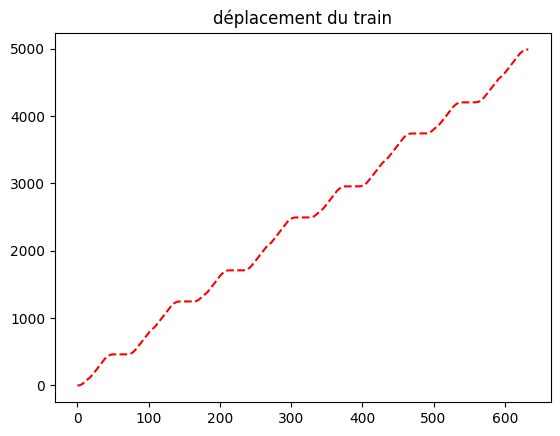

In [2]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('marche.txt')


x = data[:, 0]
y = data[:, 1]
plt.figure()
plt.title("déplacement du train")
plt.plot(x,y,'r--')
plt.show()

- Puissance mécanique a fournir

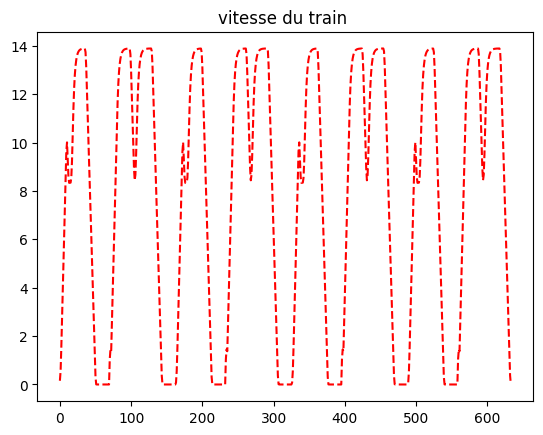

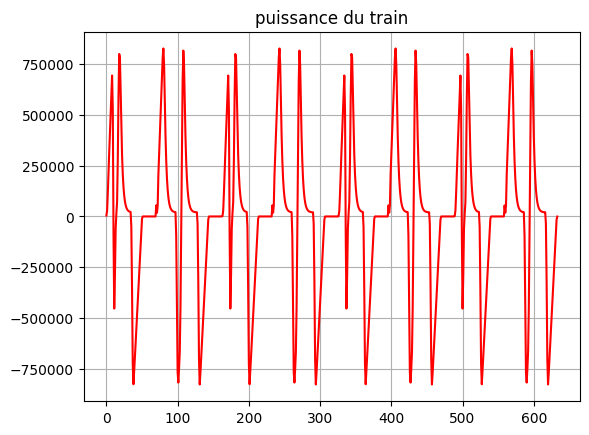

In [3]:
A0,A1=780,6.4/1e3
B0,B1=0,0.14/1e3
C0,C1=0.3634,0
M=70*1e3 #tonnes
V=np.gradient(y, x)
accel=np.gradient(V,x)
#plt.grid()
plt.figure()
plt.title("vitesse du train ")
plt.plot(V,'r--')
Fres=(A0+A1*M)+(B0+B1*M)*V+(C0+C1*M)*V**2
Fmot=M*accel+Fres
Pmec=Fmot*V
plt.figure()
plt.title("puissance du train")
plt.grid()
#plt.xlim([0,100])
plt.plot(Pmec,'r')

- Tension du train

In [4]:
import math

Vsst = 790
Rsst = 33 * 1e-3
rho_LAC = 95 * 1e-6
rho_rail = 10 * 1e-6

L = y[-1]

R_LAC1 = rho_LAC * y
R_LAC2 = rho_LAC * (L - y)
R_rail1 = rho_rail * y
R_rail2 = rho_rail * (L - y)

Req1 = Rsst + R_LAC1 + R_rail1
Req2 = Rsst + R_LAC2 + R_rail2
Req_total = Req1*Req2/(Req1+Req2)


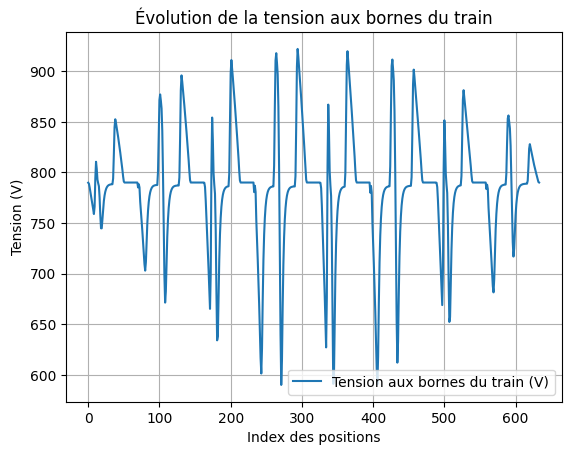

In [5]:
Vtrain = []
for r, p in zip(Req_total, Pmec):
    discriminant = Vsst**2 - 4 * r * p
    if discriminant >= 0:  
        V = 0.5 * (Vsst + math.sqrt(discriminant))
    else:
        V = 500  
    Vtrain.append(V)


Vtrain = np.array(Vtrain)

# Tracé de la courbe
plt.plot(Vtrain, label="Tension aux bornes du train (V)")
plt.xlabel("Index des positions")
plt.grid()
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension aux bornes du train")
plt.legend()

plt.show()

# courant consommé par le train 


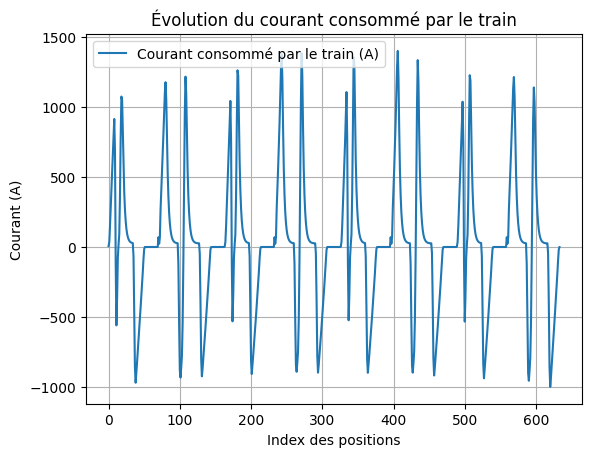

In [6]:
Itrain = Pmec / Vtrain
plt.plot(Itrain, label="Courant consommé par le train (A)")
plt.xlabel("Index des positions")
plt.ylabel("Courant (A)")
plt.title("Évolution du courant consommé par le train")
plt.legend()
plt.grid()
plt.show()


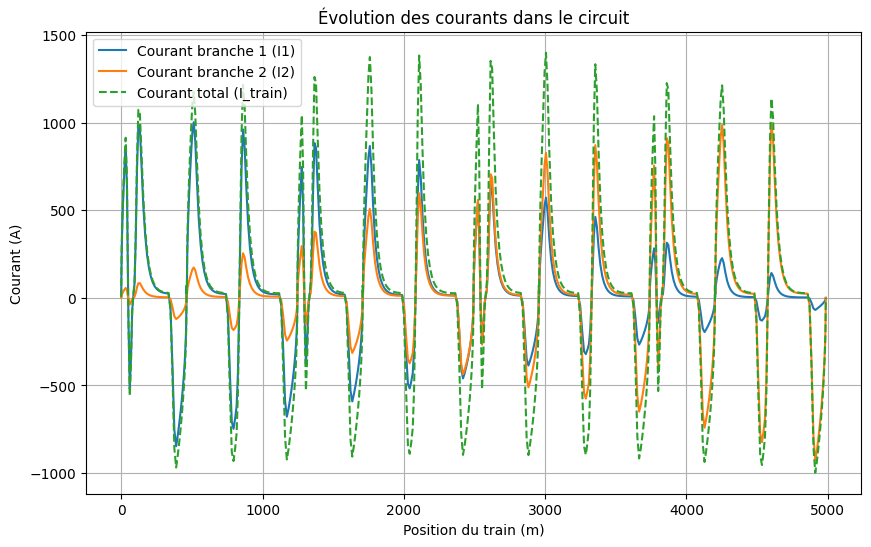

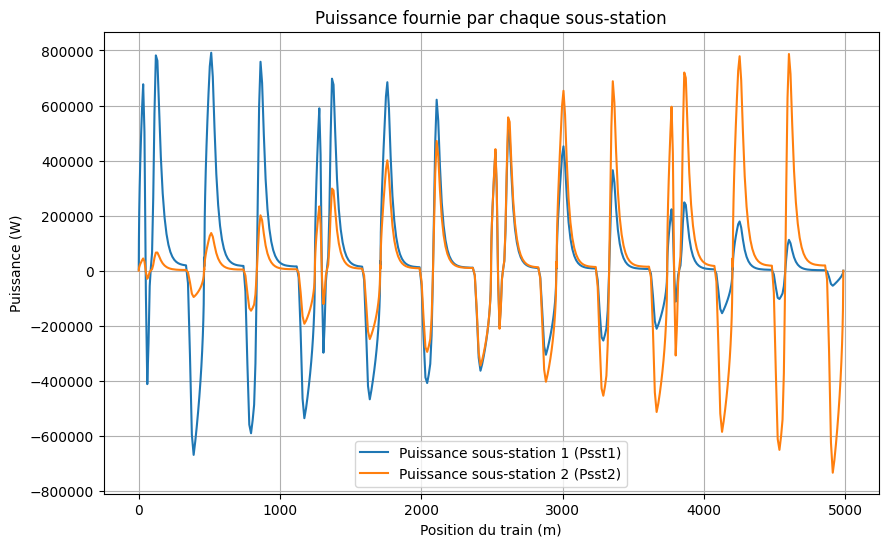

In [7]:


Vsst = 790
Rsst = 33 * 1e-3
rho_LAC = 95 * 1e-6
rho_rail = 10 * 1e-6

L = y[-1]

R_LAC1 = rho_LAC * y
R_LAC2 = rho_LAC * (L - y)
R_rail1 = rho_rail * y
R_rail2 = rho_rail * (L - y)

Req1 = Rsst + R_LAC1 + R_rail1
Req2 = Rsst + R_LAC2 + R_rail2

Req_total = Req1*Req2/(Req1+Req2)

I_train = (Vsst-Vtrain)/ Req_total
I1 = (Vsst-Vtrain) / Req1
I2 = (Vsst-Vtrain) / Req2



Psst1 = Vsst * I1
Psst2 = Vsst * I2

plt.figure(figsize=(10, 6))
plt.plot(y, I1, label="Courant branche 1 (I1)", linewidth=1.5)
plt.plot(y, I2, label="Courant branche 2 (I2)", linewidth=1.5)
plt.plot(y, I_train, label="Courant total (I_train)", linestyle='--', linewidth=1.5)
plt.xlabel("Position du train (m)")
plt.ylabel("Courant (A)")
plt.title("Évolution des courants dans le circuit")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y, Psst1, label="Puissance sous-station 1 (Psst1)", linewidth=1.5)
plt.plot(y, Psst2, label="Puissance sous-station 2 (Psst2)", linewidth=1.5)
plt.xlabel("Position du train (m)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie par chaque sous-station")
plt.legend()
plt.grid()
plt.show()


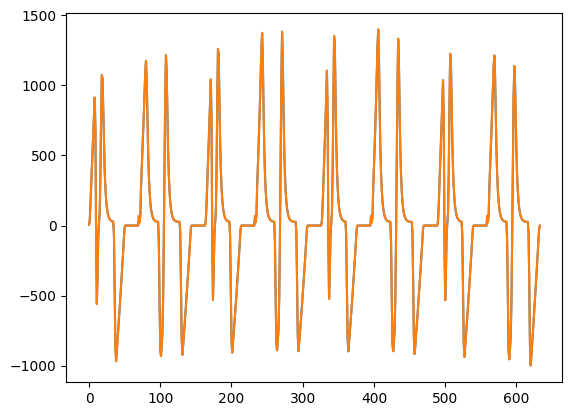

In [8]:
plt.plot(I1+I2)
plt.plot(Itrain)

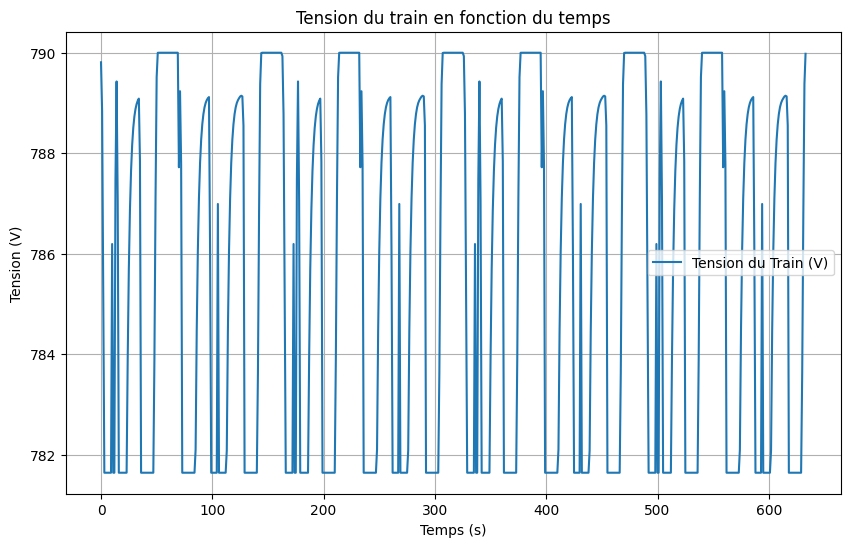

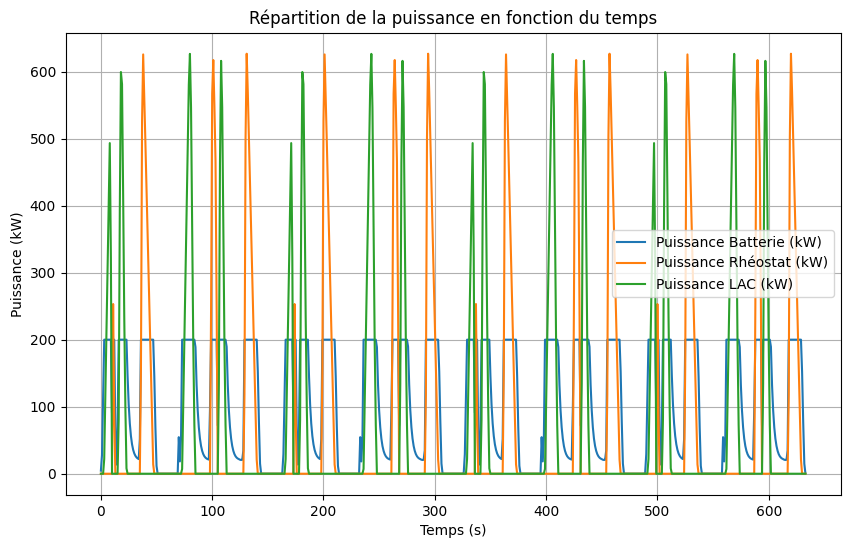

In [9]:
# Initialisation des paramètres
V_nominal = 790  # Tension nominale (V)
R_internal = 0.033  # Résistance interne batterie (ohms)

E_battery = 100  # Capacité initiale de la batterie (kWh)
P_max_battery = 200e3  # Puissance max de la batterie (W)
P_train=Vtrain*I_train
# Simulation de la batterie
position=y
time=x



# Initialisation des variables
P_battery = np.zeros_like(P_train)
P_rheostat = np.zeros_like(P_train)
P_LAC = np.zeros_like(P_train)
E_battery_history = [E_battery]
V_train = np.zeros_like(P_train)

for i in range(len(P_train)):
    if P_train[i] > 0:  # Phase de traction
        if E_battery > 0:  # Batterie peut fournir de l'énergie
            P_battery[i] = min(P_max_battery, P_train[i])
        P_LAC[i] = P_train[i] - P_battery[i]
    else:  # Phase de freinage
        P_battery[i] = min(P_max_battery, -P_train[i])
        if E_battery >= 100:  # Batterie pleine
            P_rheostat[i] = -P_train[i] - P_battery[i]
    
    # Mise à jour de l'énergie de la batterie
    E_battery += P_battery[i] * (time[1] - time[0]) / 3600  # kWh
    E_battery_history.append(E_battery)
    
    # Calcul de la tension du train
    V_train[i] = V_nominal - R_internal * P_battery[i] / V_nominal

# Résultats et visualisation
plt.figure(figsize=(10, 6))
plt.plot(time, V_train, label="Tension du Train (V)")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.title("Tension du train en fonction du temps")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time, P_battery / 1e3, label="Puissance Batterie (kW)")
plt.plot(time, P_rheostat / 1e3, label="Puissance Rhéostat (kW)")
plt.plot(time, P_LAC / 1e3, label="Puissance LAC (kW)")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (kW)")
plt.title("Répartition de la puissance en fonction du temps")
plt.legend()
plt.grid(True)
plt.show()


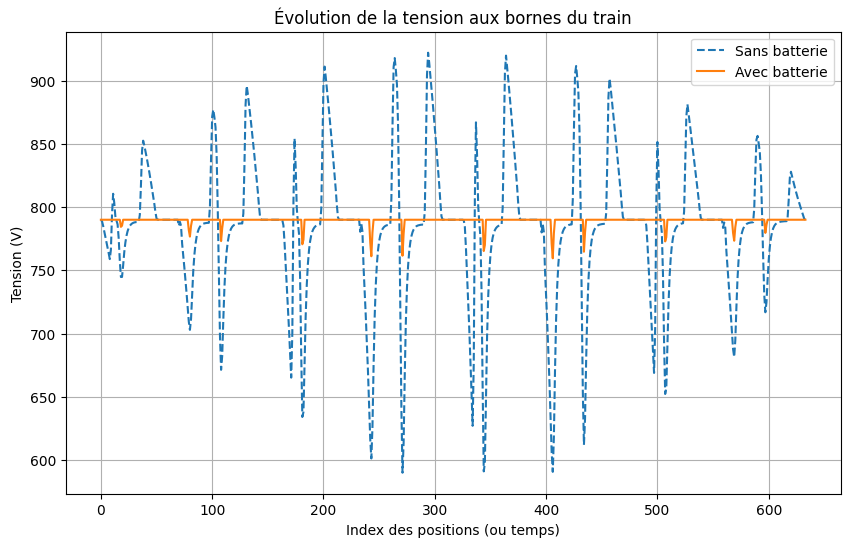

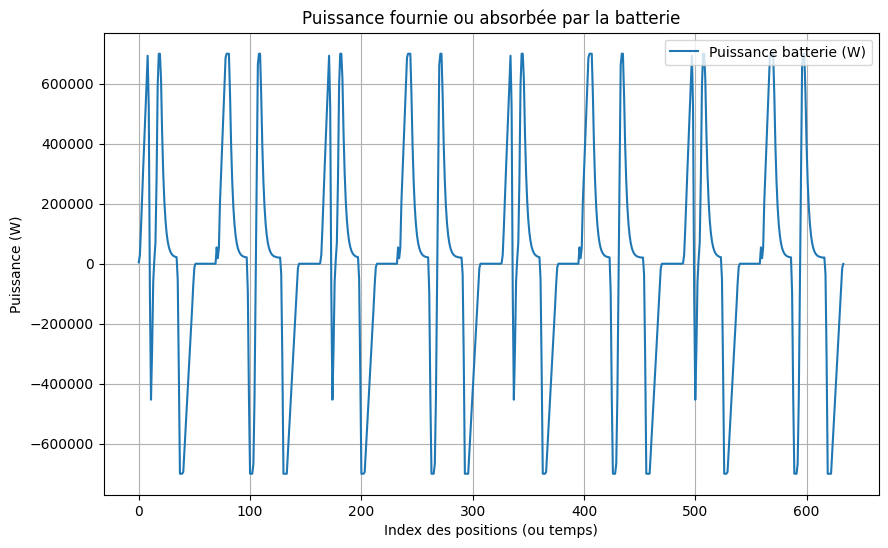

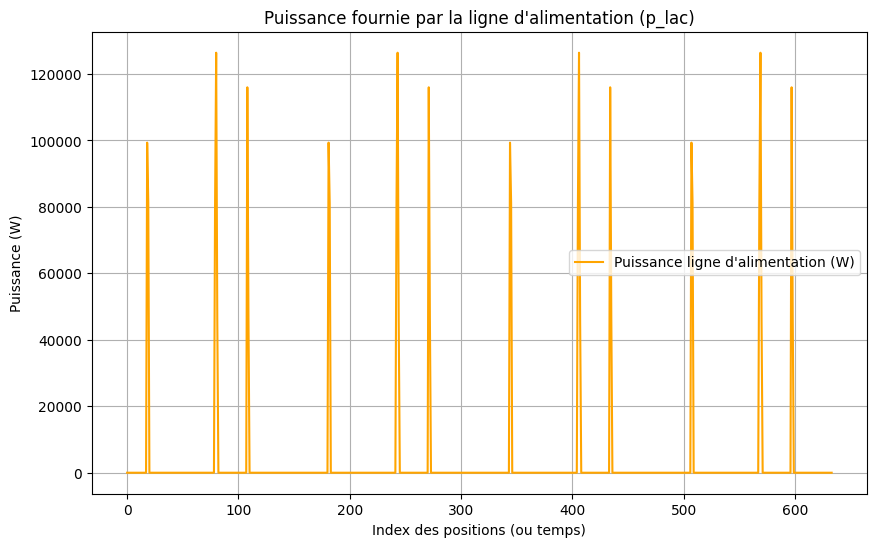

In [10]:
# Paramètres de la batterie
capacite_batterie_kWh = 1000
capacite_batterie_J = capacite_batterie_kWh * 3.6e6  # Conversion en Joules
etat_charge = capacite_batterie_J  # État initial : batterie pleine
puissance_max_batterie = 700e3  # Puissance maximale de la batterie (700 kW)

# Gestion de la batterie
P_batt = []
V_train_batt = []  # Tension du train avec batterie
P_lac_list = []    # Liste pour stocker p_lac

for p_train, v_train, r_eq in zip(Pmec, Vtrain, Req_total):
    if p_train < 0:  # Pendant le freinage
        # Stocker l'énergie récupérée si la batterie n'est pas pleine
        delta_e_s = min(-p_train, puissance_max_batterie)  
        etat_charge = min(etat_charge + delta_e_s, capacite_batterie_J)
        P_batt.append(-delta_e_s)  # Batterie absorbe de la puissance
       
    elif p_train > 0:  # Pendant la consommation
        if etat_charge > 0:  # Batterie peut fournir de l'énergie
            delta_e_d = min(p_train, puissance_max_batterie, etat_charge)  # Disponible
            etat_charge -= delta_e_d
            P_batt.append(delta_e_d)  # Batterie fournit de la puissance
        else:
            P_batt.append(0)  # Batterie vide, pas de contribution
    else:
        P_batt.append(0)  # Pas de consommation ni de freinage

    # Calcul de la puissance à fournir par la ligne
    p_lac = p_train - P_batt[-1]
    p_lac = max(0, p_lac)  # Condition : p_lac >= 0
    P_lac_list.append(p_lac)  # Stocker p_lac pour le tracé

    # Calcul de la tension avec les pertes résistives
    if v_train > 0:  # Évite la division par zéro
        v_batt = Vsst - r_eq * (p_lac / v_train)
    else:
        v_batt = Vsst  # Si le train est immobile, aucune perte résistive

    # Stocker les résultats
    V_train_batt.append(v_batt)

# Conversion en tableau NumPy
V_train_batt = np.array(V_train_batt)
P_batt = np.array(P_batt)
P_lac = np.array(P_lac_list)

# Tracé de la tension avec batterie
plt.figure(figsize=(10, 6))
plt.plot(Vtrain, label="Sans batterie", linestyle="--", linewidth=1.5)
plt.plot(V_train_batt, label="Avec batterie", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension aux bornes du train")
plt.legend()
plt.grid()
plt.show()

# Tracé de la puissance de la batterie
plt.figure(figsize=(10, 6))
plt.plot(P_batt, label="Puissance batterie (W)", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie ou absorbée par la batterie")
plt.legend()
plt.grid()
plt.show()

# Tracé de la puissance fournie par la ligne (p_lac)
plt.figure(figsize=(10, 6))
plt.plot(P_lac, label="Puissance ligne d'alimentation (W)", color="orange", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie par la ligne d'alimentation (p_lac)")
plt.legend()
plt.grid()
plt.show()

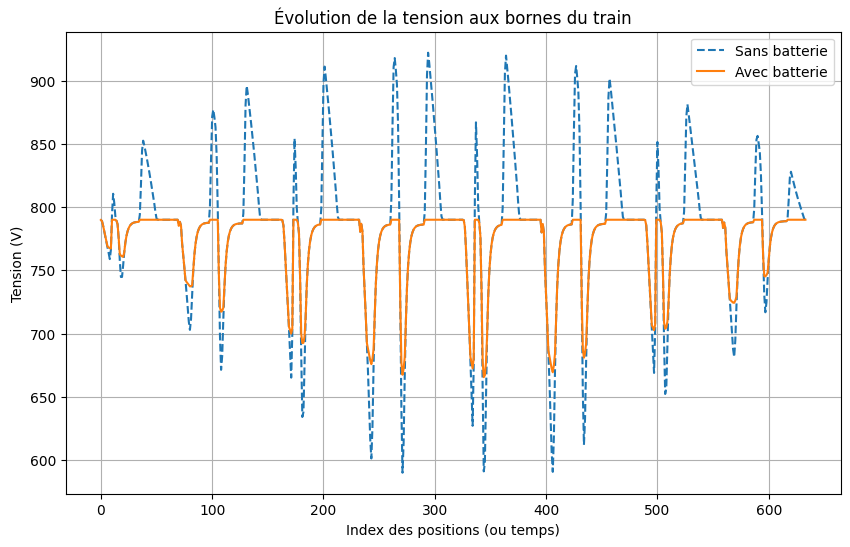

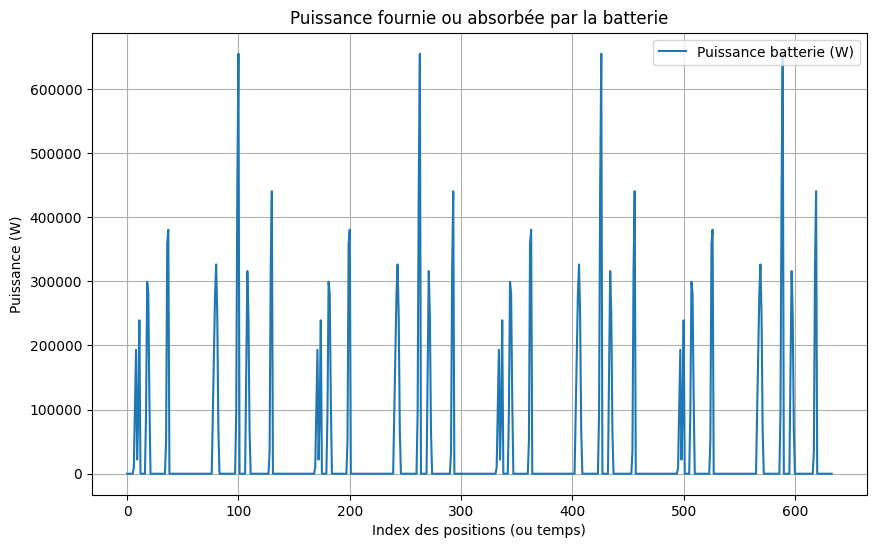

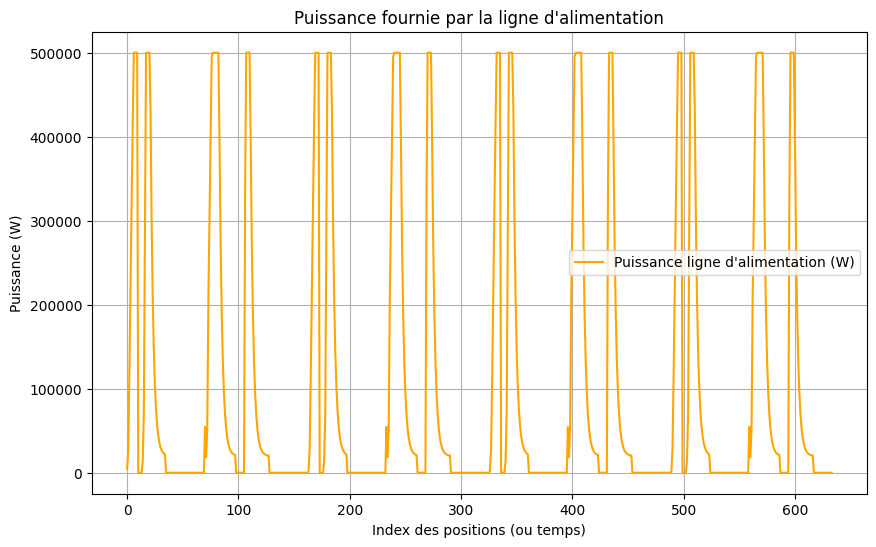

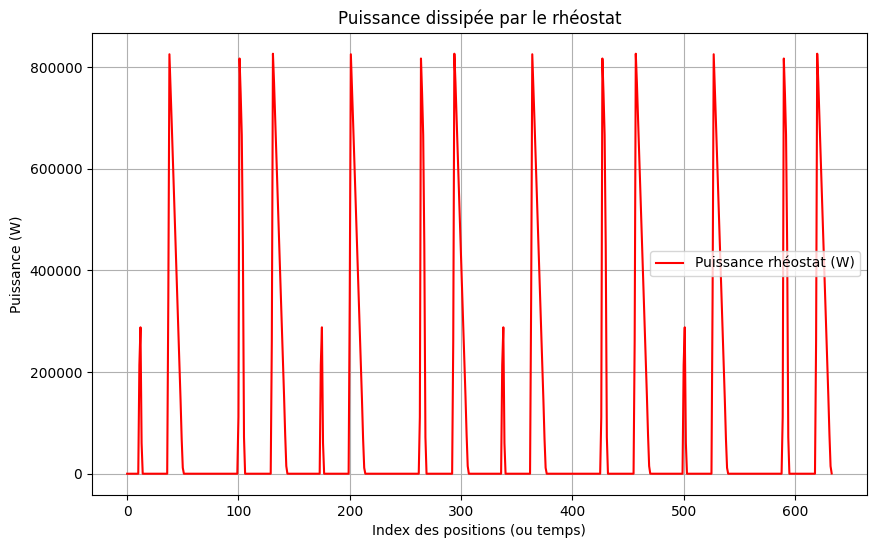

In [11]:
# Paramètres de la batterie
capacite_batterie_kWh = 1000
capacite_batterie_J = capacite_batterie_kWh * 3.6e6  # Conversion en Joules
etat_charge = capacite_batterie_J  # État initial : batterie pleine
puissance_max_batterie = 700e3  # Puissance maximale de la batterie (700 kW)

# Seuil pour la LAC
P_seuil = 500e3  # Seuil en Watts

# Variables pour stocker les résultats
P_batt = []  # Puissance batterie
P_lac = []   # Puissance ligne d'alimentation
P_rheo = []  # Puissance rhéostat
V_train_batt = []  # Tension du train avec batterie

# Simulation de gestion de puissance
for p_train, v_train, r_eq in zip(Pmec, Vtrain, Req_total):
    # Initialisation des puissances
    p_batt = 0
    p_lac_val = 0
    p_rheo = 0

    if p_train < 0:  # Freinage (récupération d'énergie)
        p_batt = min(-p_train, puissance_max_batterie)  # Puissance récupérable
        if etat_charge + p_batt > capacite_batterie_J:  # Batterie pleine
            p_rheo = -p_train - (capacite_batterie_J - etat_charge)  # Excès au rhéostat
            p_batt = capacite_batterie_J - etat_charge
        etat_charge += p_batt  # Mise à jour de l'état de charge

    elif 0 <= p_train < P_seuil:  # Phase de consommation modérée
        p_lac_val = p_train  # Tout est fourni par la LAC

    elif p_train >= P_seuil:  # Phase de forte consommation
        p_batt = min(p_train - P_seuil, puissance_max_batterie, etat_charge)  # Contribution batterie
        p_lac_val = p_train - p_batt  # Complément par la LAC
        etat_charge -= p_batt  # Mise à jour de l'état de charge

    # Calcul de la tension avec la LAC et les pertes résistives
    v_batt = Vsst - r_eq * (p_lac_val / v_train) if v_train > 0 else Vsst

    # Stockage des résultats
    P_batt.append(p_batt)
    P_lac.append(p_lac_val)
    P_rheo.append(p_rheo)
    V_train_batt.append(v_batt)

# Conversion des résultats en tableaux NumPy
P_batt = np.array(P_batt)
P_lac = np.array(P_lac)
P_rheo = np.array(P_rheo)
V_train_batt = np.array(V_train_batt)

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(Vtrain, label="Sans batterie", linestyle="--", linewidth=1.5)
plt.plot(V_train_batt, label="Avec batterie", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension aux bornes du train")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(P_batt, label="Puissance batterie (W)", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie ou absorbée par la batterie")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(P_lac, label="Puissance ligne d'alimentation (W)", color="orange", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie par la ligne d'alimentation")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(P_rheo, label="Puissance rhéostat (W)", color="red", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance dissipée par le rhéostat")
plt.legend()
plt.grid()
plt.show()


# ajout du rendement + ajustements de la prof

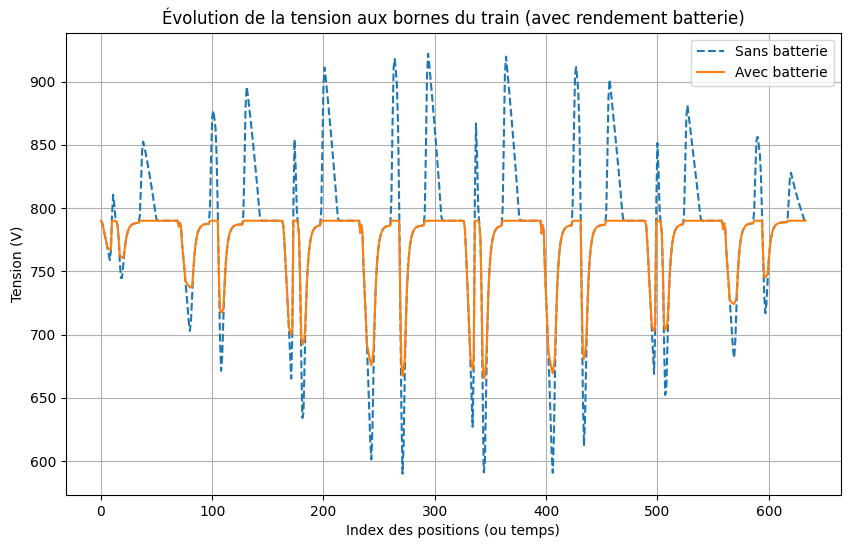

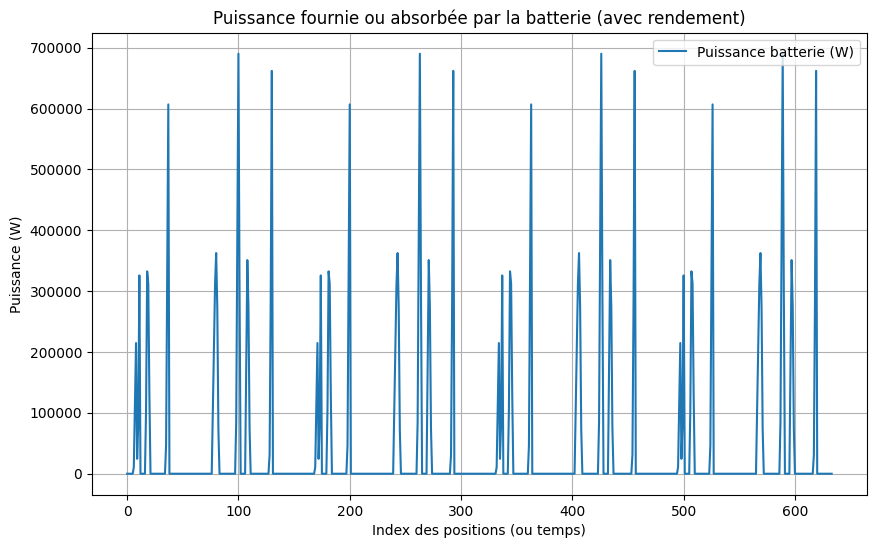

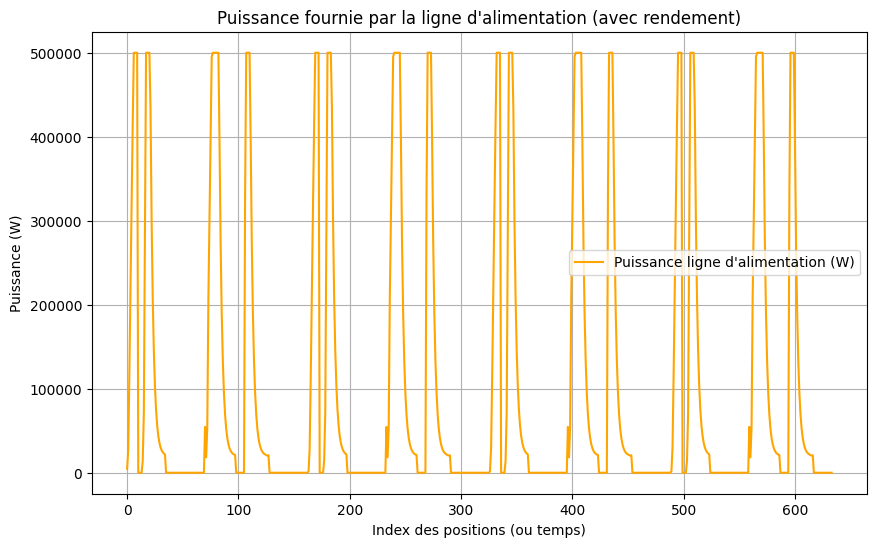

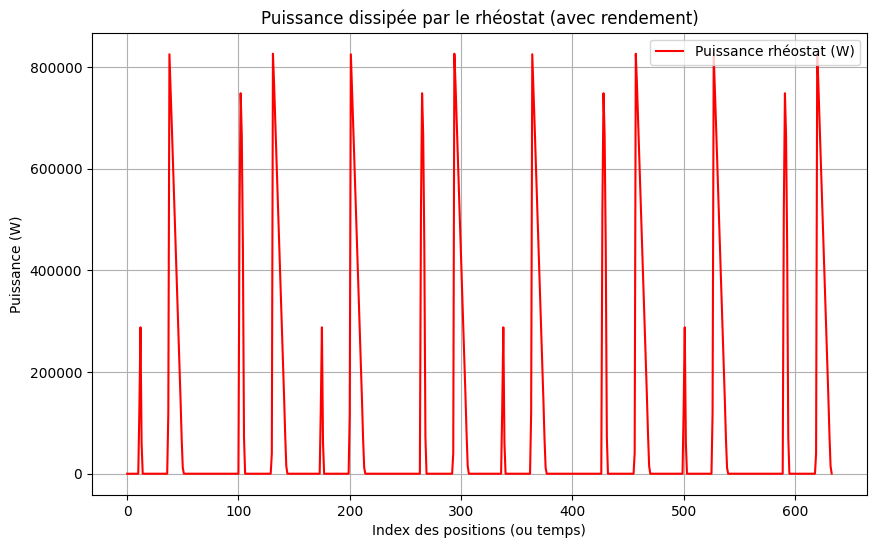

In [12]:
# Paramètres de la batterie
capacite_batterie_kWh = 1000
capacite_batterie_J = capacite_batterie_kWh * 3.6e6  # Conversion en Joules
etat_charge = capacite_batterie_J  # État initial : batterie pleine
puissance_max_batterie = 700e3  # Puissance maximale de la batterie (700 kW)
eta_batterie = 0.9  # Rendement de la batterie (90%)

# Seuil pour la LAC
P_seuil = 500e3  # Seuil en Watts

# Variables pour stocker les résultats
P_batt = []  # Puissance batterie
P_lac = []   # Puissance ligne d'alimentation
P_rheo = []  # Puissance rhéostat
V_train_batt = []  # Tension du train avec batterie

# Simulation de gestion de puissance
for p_train, v_train, r_eq in zip(Pmec, Vtrain, Req_total):
    # Initialisation des puissances
    p_batt = 0
    p_lac_val = 0
    p_rheo = 0

    if p_train < 0:  # Freinage (récupération d'énergie)
        # Puissance récupérable par la batterie (rendement inclus)
        p_batt_absorbable = min(-p_train * eta_batterie, puissance_max_batterie)
        if etat_charge + p_batt_absorbable > capacite_batterie_J:  # Batterie pleine
            p_rheo = -p_train - (capacite_batterie_J - etat_charge) / eta_batterie
            p_batt_absorbable = (capacite_batterie_J - etat_charge) / eta_batterie
        p_batt = p_batt_absorbable
        etat_charge += p_batt * eta_batterie  # Mise à jour de l'état de charge

    elif 0 <= p_train < P_seuil:  # Phase de consommation modérée
        p_lac_val = p_train  # Tout est fourni par la LAC

    elif p_train >= P_seuil:  # Phase de forte consommation
        # Puissance disponible par la batterie (rendement inclus)
        p_batt_disponible = min((p_train - P_seuil) / eta_batterie, puissance_max_batterie, etat_charge)
        p_batt = p_batt_disponible
        p_lac_val = p_train - p_batt * eta_batterie
        etat_charge -= p_batt  # Mise à jour de l'état de charge

    # Calcul de la tension avec la LAC et les pertes résistives
    v_batt = Vsst - r_eq * (p_lac_val / v_train) if v_train > 0 else Vsst

    # Stockage des résultats
    P_batt.append(p_batt)
    P_lac.append(p_lac_val)
    P_rheo.append(p_rheo)
    V_train_batt.append(v_batt)

# Conversion des résultats en tableaux NumPy
P_batt = np.array(P_batt)
P_lac = np.array(P_lac)
P_rheo = np.array(P_rheo)
V_train_batt = np.array(V_train_batt)

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(Vtrain, label="Sans batterie", linestyle="--", linewidth=1.5)
plt.plot(V_train_batt, label="Avec batterie", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension aux bornes du train (avec rendement batterie)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(P_batt, label="Puissance batterie (W)", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie ou absorbée par la batterie (avec rendement)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(P_lac, label="Puissance ligne d'alimentation (W)", color="orange", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie par la ligne d'alimentation (avec rendement)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(P_rheo, label="Puissance rhéostat (W)", color="red", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance dissipée par le rhéostat (avec rendement)")
plt.legend()
plt.grid()
plt.show()


In [67]:
def simulate_power_management(Pmec, Vtrain, Req_total, Vsst, capacite_batterie_kWh, P_seuil, eta_batterie):
    """
    Simule la gestion de puissance avec batterie et génère des graphiques.

    Paramètres :
    - Pmec : Liste des puissances demandées par le train (W).
    - Vtrain : Liste des tensions au train (V).
    - Req_total : Liste des résistances équivalentes (ohms).
    - Vsst : Tension de la sous-station (V).
    - capacite_batterie_kWh : Capacité de la batterie (kWh).
    - puissance_max_batterie : Puissance maximale de la batterie (W).
    - P_seuil : Seuil de puissance pour la LAC (W).
    - eta_batterie : Rendement de la batterie (entre 0 et 1).

    Retourne :
    - P_batt : Puissance absorbée ou fournie par la batterie (W).
    - P_lac : Puissance fournie par la ligne d'alimentation (W).
    - P_rheo : Puissance dissipée par le rhéostat (W).
    - V_train_batt : Tension au niveau du train avec gestion de batterie (V).
    """
    # Conversion de la capacité en Joules
    capacite_batterie_J = capacite_batterie_kWh * 3.6e6
    etat_charge = capacite_batterie_J  # Batterie initialement pleine

    # Initialisation des listes de résultats
    P_batt = []
    P_lac = []
    P_rheo = []
    V_train_batt = []
    Vtrain_monte=[]

    # Simulation de gestion de puissance
    for p_train, v_train, r_eq in zip(Pmec, Vtrain, Req_total):
        p_batt = 0
        p_lac_val = 0
        p_rheo = 0

        if p_train < 0:  # Freinage (récupération d'énergie)
            p_batt_absorbable = -p_train * eta_batterie
            if etat_charge + p_batt_absorbable > capacite_batterie_J:  # Batterie pleine
                p_rheo = -p_train - (capacite_batterie_J - etat_charge) / eta_batterie
                p_batt_absorbable = (capacite_batterie_J - etat_charge) / eta_batterie
            p_batt = p_batt_absorbable
            etat_charge += p_batt * eta_batterie

        elif 0 <= p_train < P_seuil:  # Consommation modérée
            p_lac_val = p_train

        elif p_train >= P_seuil:  # Forte consommation
            p_batt_disponible = min((p_train - P_seuil) / eta_batterie, etat_charge)
            p_batt = p_batt_disponible
            p_lac_val = p_train - p_batt * eta_batterie
            etat_charge -= p_batt

        # Calcul de la tension avec la LAC et les pertes résistives
        v_batt = Vsst - r_eq * (p_lac_val / v_train) if v_train > 0 else Vsst
        
        discriminant = Vsst**2 - (4 * r_eq * p_lac_val)
        if discriminant >= 0:  
            V = 0.5 * (Vsst + math.sqrt(discriminant))
        else:
            V = 0
        

        # Stockage des résultats
        
        Vtrain_monte.append(V)
        P_batt.append(p_batt)
        P_lac.append(p_lac_val)
        P_rheo.append(p_rheo)
        V_train_batt.append(v_batt)

    
    # Conversion en tableaux NumPy
    Vtrain_monte = np.array(Vtrain_monte)
    P_batt = np.array(P_batt)
    P_lac = np.array(P_lac)
    P_rheo = np.array(P_rheo)
    V_train_batt = np.array(V_train_batt)



    return P_batt, P_lac, P_rheo, V_train_batt,Vtrain_monte



In [75]:
import numpy as np
import matplotlib.pyplot as plt
import math

def monte_carlo_simulation(Pmec, Vtrain, Req_total, Vsst, n_simulations):
    """
    Effectue une simulation Monte Carlo pour explorer différentes configurations.
    
    Paramètres :
    - Pmec : Liste des puissances demandées par le train (W).
    - Vtrain : Liste des tensions au train (V).
    - Req_total : Liste des résistances équivalentes (ohms).
    - Vsst : Tension de la sous-station (V).
    - n_simulations : Nombre de simulations Monte Carlo.
    
    Retourne :
    - solutions : Dictionnaire contenant les résultats des simulations.
    """
    # Plages pour les variables de décision
    capacite_min, capacite_max = 0, 13  # Capacité batterie (kWh)
    seuil_min, seuil_max = 0, 1e6 # Seuil pour la LAC (W)
      # Puissance maximale de la batterie (W)
    eta_batterie = 0.9  # Rendement de la batterie

    # Génération aléatoire des paramètres
    capacites = np.random.uniform(capacite_min, capacite_max, n_simulations)
    seuils = np.random.uniform(seuil_min, seuil_max, n_simulations)

    # Résultats des simulations
    delta_V_max_list = []
    couts_batterie = []
    tensions_moyennes = []

    # Lancer les simulations Monte Carlo
    for capacite, seuil in zip(capacites, seuils):
        # Simulation avec les paramètres générés
        _, _, _, _, Vtrain_monte = simulate_power_management(
            Pmec, Vtrain, Req_total, Vsst, capacite, seuil, eta_batterie
        )
        
        # Calcul de la chute de tension maximale et du coût
        delta_V_max = np.max(Vsst - Vtrain_monte)
        delta_V_max_list.append(delta_V_max)
        couts_batterie.append(capacite)
        tensions_moyennes.append(np.mean(Vtrain_monte))

    # Retourner les résultats sous forme de dictionnaire
    return {
        "Capacite_batterie_kWh": capacites,
        "Seuil_W": seuils,
        "Delta_V_max_V": np.array(delta_V_max_list),
        "Cout_batterie_kWh": np.array(couts_batterie),
        "Tensions_moyennes_V": np.array(tensions_moyennes),
    }


# Exemple d'utilisation
#Vsst = 790  # Tension réseau (V)
n_simulations = 1000 # Nombre de simulations Monte Carlo

# Lancer la simulation Monte Carlo
solutions = monte_carlo_simulation(Pmec, Vtrain, Req_total, Vsst, n_simulations)




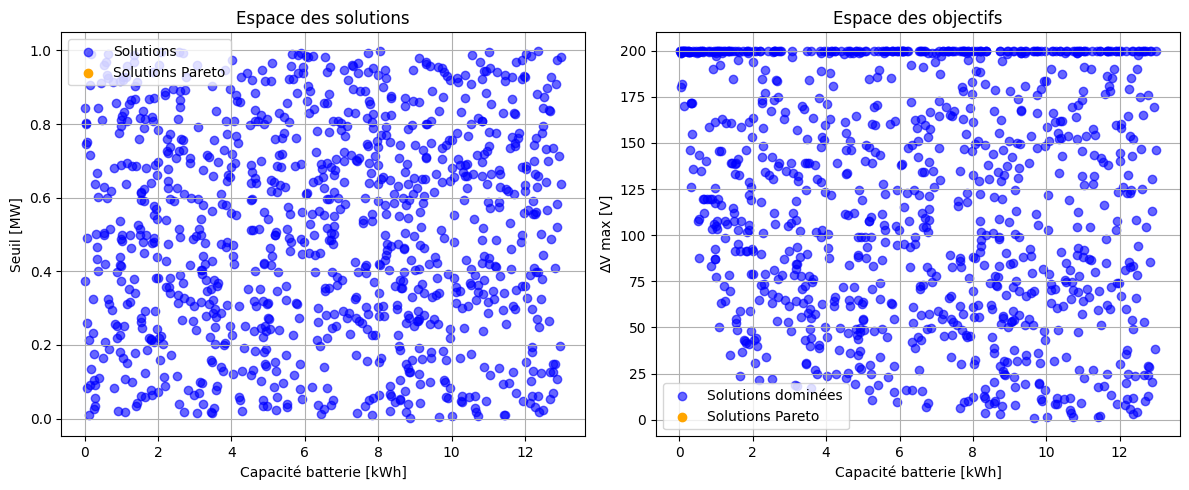

In [76]:
capacites = solutions["Capacite_batterie_kWh"]
seuils = solutions["Seuil_W"] / 1e6  # Conversion en MW pour l'affichage
delta_V_max = solutions["Delta_V_max_V"]
couts_batterie = solutions["Cout_batterie_kWh"]

# Identifier le front de Pareto
pareto_indices = []
for i in range(len(delta_V_max)):
    if all(delta_V_max[i] <= delta_V_max[j] and couts_batterie[i] <= couts_batterie[j]
           for j in range(len(delta_V_max)) if i != j):
        pareto_indices.append(i)

# Tracé de l'espace des solutions
plt.figure(figsize=(12, 5))

# Espace des solutions
plt.subplot(1, 2, 1)
plt.scatter(capacites, seuils, c='blue', alpha=0.6, label="Solutions")
plt.scatter(capacites[pareto_indices], seuils[pareto_indices], c='orange', label="Solutions Pareto")
plt.xlabel("Capacité batterie [kWh]")
plt.ylabel("Seuil [MW]")
plt.title("Espace des solutions")
plt.grid()
plt.legend()

# Espace des objectifs
plt.subplot(1, 2, 2)
plt.scatter(couts_batterie, delta_V_max, c='blue', alpha=0.6, label="Solutions dominées")
plt.scatter(couts_batterie[pareto_indices], delta_V_max[pareto_indices], c='orange', label="Solutions Pareto")
plt.xlabel("Capacité batterie [kWh]")
plt.ylabel("∆V max [V]")
plt.title("Espace des objectifs")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()